In [9]:
import sys
import os
sys.path.append(os.path.abspath('..')) 

from utils import *
import matplotlib.pyplot as plt

t_pre = 0.5#0.2
t_post = 0.50#0.300
bin_width = 0.005
# Créer les bins de temps"
psth_bins = np.arange(-t_pre, t_post, bin_width)


In [14]:
playback_sessions = ['ALTAI_20240724_SESSION_01', 'ALTAI_20240724_SESSION_02', 'ALTAI_20240725_SESSION_00', 'ALTAI_20240726_SESSION_01','ALTAI_20240809_SESSION_00', 'ALTAI_20240814_SESSION_00', 'ALTAI_20240822_SESSION_00']

trackingonly_sessions = ['ALTAI_20240910_SESSION_00','ALTAI_20240722_SESSION_02', 'ALTAI_20240722_SESSION_04', 'ALTAI_20240712_SESSION_01']

playbackonly_sessions = ['ALTAI_20240710_SESSION_00', 'ALTAI_20240711_SESSION_00', 'ALTAI_20240711_SESSION_01', 'ALTAI_20240712_SESSION_00']

all_sessions = np.hstack((playback_sessions, trackingonly_sessions, playbackonly_sessions))

tracking_psth, playback_psth = [], []

for session in all_sessions:
    print(session)
    #path = '/Volumes/data2/eTheremin/ALTAI/'+ session + '/' in macbook
    path = '/auto/data2/eTheremin/ALTAI/' + session + '/' # on linux
    try : 
        tracking_psth.append(np.load(path+f'psth_tracking_{bin_width}.npy'))
    except : 
        pass
    try:
        playback_psth.append(np.load(path+f'psth_playback_{bin_width}.npy'))
    except:
        pass
tr_psth = np.vstack(tracking_psth)
pb_psth = np.vstack(playback_psth)


ALTAI_20240724_SESSION_01
ALTAI_20240724_SESSION_02
ALTAI_20240725_SESSION_00
ALTAI_20240726_SESSION_01
ALTAI_20240809_SESSION_00
ALTAI_20240814_SESSION_00
ALTAI_20240822_SESSION_00
ALTAI_20240910_SESSION_00
ALTAI_20240722_SESSION_02
ALTAI_20240722_SESSION_04
ALTAI_20240712_SESSION_01
ALTAI_20240710_SESSION_00
ALTAI_20240711_SESSION_00
ALTAI_20240711_SESSION_01
ALTAI_20240712_SESSION_00


In [15]:
len(pb_psth)

335

In [16]:
# Calcul des features pour les psth
tr_sustained = [get_sustained_activity(psth, t_pre, t_post, bin_width) for psth in tr_psth]
pb_sustained = [get_sustained_activity(psth, t_pre, t_post, bin_width) for psth in pb_psth]

tr_total_evoked = get_total_evoked_response(tr_psth, t_pre, t_post, bin_width, None, 0, 140)
pb_total_evoked = get_total_evoked_response(pb_psth, t_pre, t_post, bin_width, None, 0, 140)

tr_peak = [tr_total_evoked[i] - tr_sustained[i] for i in range(len(tr_sustained))]
pb_peak = [pb_total_evoked[i] - pb_sustained[i] for i in range(len(pb_sustained))]


In [17]:
X_tr = np.column_stack((tr_sustained, tr_total_evoked, tr_peak))
X_pb = np.column_stack((pb_sustained, pb_total_evoked, pb_peak))
y_tr = np.zeros(len(X_tr))
y_pb = np.ones(len(X_pb))

In [26]:
X = np.vstack((X_tr, X_pb))
y = np.hstack((y_tr, y_pb))

In [27]:
len(X)

653

In [31]:
# PCA



import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)  # Keep all 3 dimensions
X_pca = pca.fit_transform(12)
print("Explained variance ratio:", pca.explained_variance_ratio_)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Create a figure for 3D plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a 3D scatter plot
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', s=50)

# Add labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('3D Scatter Plot colored by Class')

# Add a color bar to map colors to class labels
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Class')

# Show the plot
plt.show()





ValueError: Expected 2D array, got scalar array instead:
array=12.0.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

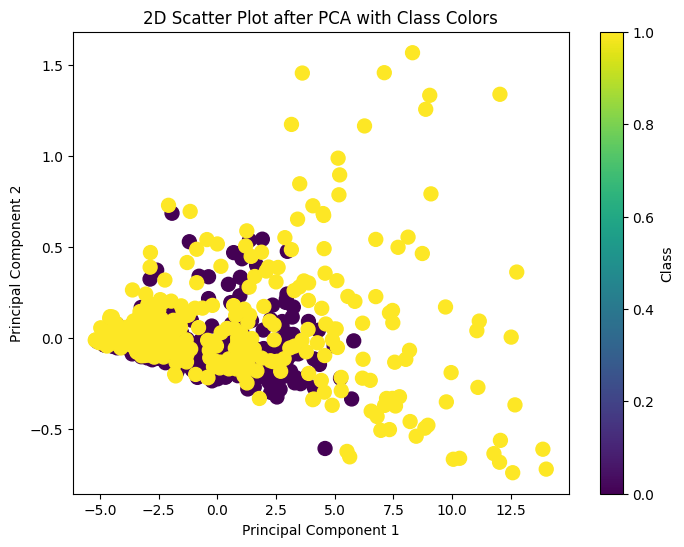

In [29]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)  # Now X_reduced is 100x2

# Step 2: Create a 2D scatter plot with class labels as colors
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', s=100)

# Step 3: Add labels and color bar
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Scatter Plot after PCA with Class Colors')
plt.colorbar(scatter, label='Class')
plt.show()

Accuracy: 0.66
Confusion Matrix:
[[48 22]
 [22 39]]


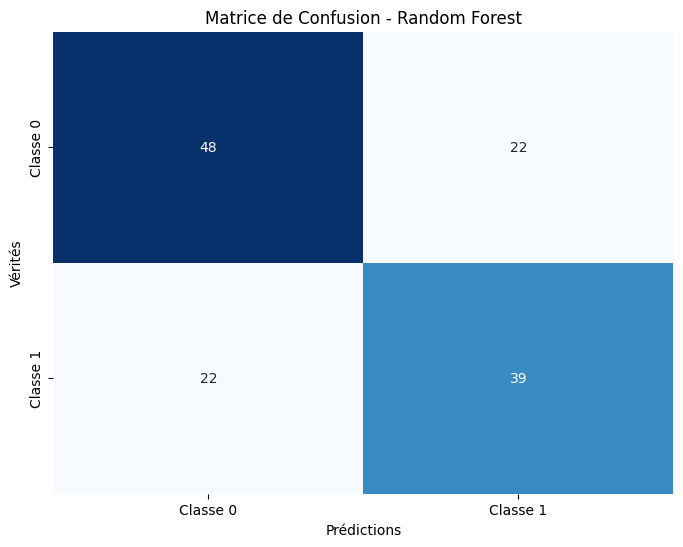

In [51]:
# Importation des bibliothèques nécessaires
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Importation des bibliothèques nécessaires
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Modèle Random Forest
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Étape 2: Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Étape 3: Créer le modèle Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 arbres

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Étape 4: Prédire les étiquettes pour les données de test
y_pred = model.predict(X_test)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Étape 5: Visualiser la matrice de confusion avec Matplotlib et Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.title("Matrice de Confusion - Random Forest")
plt.show()


